In [2]:
# There is a complex number object defined in python alredy
complex(1,2)

(1+2j)

In [4]:
# Define the Mandelbrot's function
def f(c, z):
    return z**2 + c

In [5]:
c1 = complex(1,2)
z0 = 0
f(c1, z0)

(1+2j)

In [11]:
z1 = f(c1, z0)
z2 = f(c1, z1)
z3 = f(c1, z2); z3

(-31-22j)

In [16]:
# We can use abs() method to get the norm of the complex value
abs(c1)

2.23606797749979

In [53]:
# Return a boolean value either the sequence diverges or not
def diverge(c, z=0, n_iter=20, B=20000):
    # c is just a number, c* is an arbitrary number
    c = complex(*c)
    for i in range(n_iter):
        z = f(c, z)
        if abs(z) > B: return 1
    
    return 0

In [48]:
print("If we get 1, the sequence diverges; if we get 0 does not")
diverge(c1)

If we get 1, the sequence diverges; if we get 0 does not


TypeError: complex() argument after * must be an iterable, not complex

In [49]:
diverge(complex(0,0))

TypeError: complex() argument after * must be an iterable, not complex

In [54]:
from matplotlib import pyplot as plt
import numpy as np

In [83]:
res = 500     # Resolution
xmin, xmax = -2, 1
ymin, ymax = -1, 1

xx, yy = np.meshgrid(np.linspace(xmin, xmax, res),
                    np.linspace(ymin, ymax, res))


In [84]:
np.set_printoptions(2)

In [85]:
xx

array([[-2.  , -1.99, -1.99, ...,  0.99,  0.99,  1.  ],
       [-2.  , -1.99, -1.99, ...,  0.99,  0.99,  1.  ],
       [-2.  , -1.99, -1.99, ...,  0.99,  0.99,  1.  ],
       ...,
       [-2.  , -1.99, -1.99, ...,  0.99,  0.99,  1.  ],
       [-2.  , -1.99, -1.99, ...,  0.99,  0.99,  1.  ],
       [-2.  , -1.99, -1.99, ...,  0.99,  0.99,  1.  ]])

In [86]:
yy

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
       ...,
       [ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ]])

In [87]:
xx.shape

(500, 500)

In [88]:
# We make an array (list) of complex values
points = np.c_[xx.ravel(), yy.ravel()]

In [89]:
points.shape

(250000, 2)

In [90]:
# Let's to calculate if the points diverges uses list comprehesion
mandelbrot = [diverge(c) for c in points]

In [91]:
mandelbrot = np.array(mandelbrot).reshape(res, res)

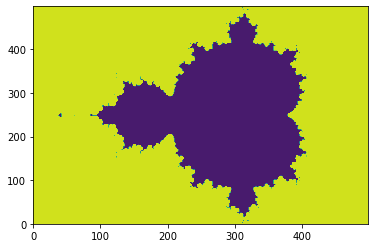

In [92]:
plt.contourf(mandelbrot)

In [174]:
# We can make an amimation modifying the exponent in the mandelbrot fuction
def f(c, z, k):
    return z**k + c

def diverge(c, k, z=0, n_iter=50, B=4):
    # c is just a number, c* is an arbitrary number
    c = complex(*c)
    for i in range(n_iter):
        z = f(c, z, k)
        if abs(z) > B: return 1
    
    return 0

In [184]:
def plot_mandelbrot(k):  
    res = 500    # Resolution
    xmin, xmax = -2, 2
    ymin, ymax = -1.2, 1.2

    xx, yy = np.meshgrid(np.linspace(xmin, xmax, res),
                        np.linspace(ymin, ymax, res))
    
    points = np.c_[xx.ravel(), yy.ravel()]
    mandelbrot = [diverge(c, k) for c in points]
    mandelbrot = np.array(mandelbrot).reshape(res, res)
    plt.contourf(mandelbrot)
    plt.axis(False)
    #plt.savefig(f'mandelbrot_{k}.png')

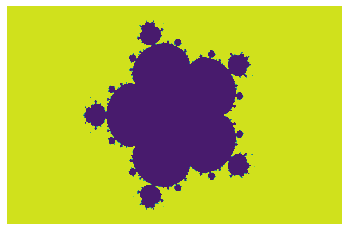

In [185]:
plot_mandelbrot(6)

KeyboardInterrupt: 

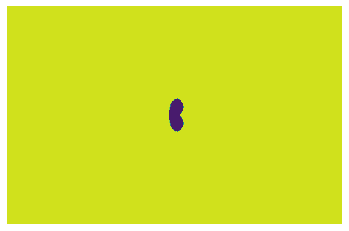

In [183]:
ks = np.linspace(1, 5, 50)

for k in ks:
    plot_mandelbrot(k)

In [ ]:
file_nms = [f'mandelbrot_{k}.png' for k in ks]

In [179]:
# We use imageio library to make a gif
import imageio

In [180]:
images = []

for file_name in file_nms:
    images.append(imageio.imread(file_name))
    
imageio.mimsave('MandelbrotHD.gif', images)
